# Project 5

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt

### Add CSV

In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to distinguish between red and white wines
df_red['red'] = 1
df_white['red'] = 0

# Concatenate the two dataframes
df_wine = pd.concat([df_red, df_white], ignore_index=True)

# remove quality levels that don't meet a certain threshold
quality_counts = df_wine['quality'].value_counts()

min_records = 100 

valid_quality_levels = quality_counts[quality_counts >= min_records].index

df_wine = df_wine[df_wine['quality'].isin(valid_quality_levels)]

# get rid of missing data
df_wine.dropna(inplace=True)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### Find best features

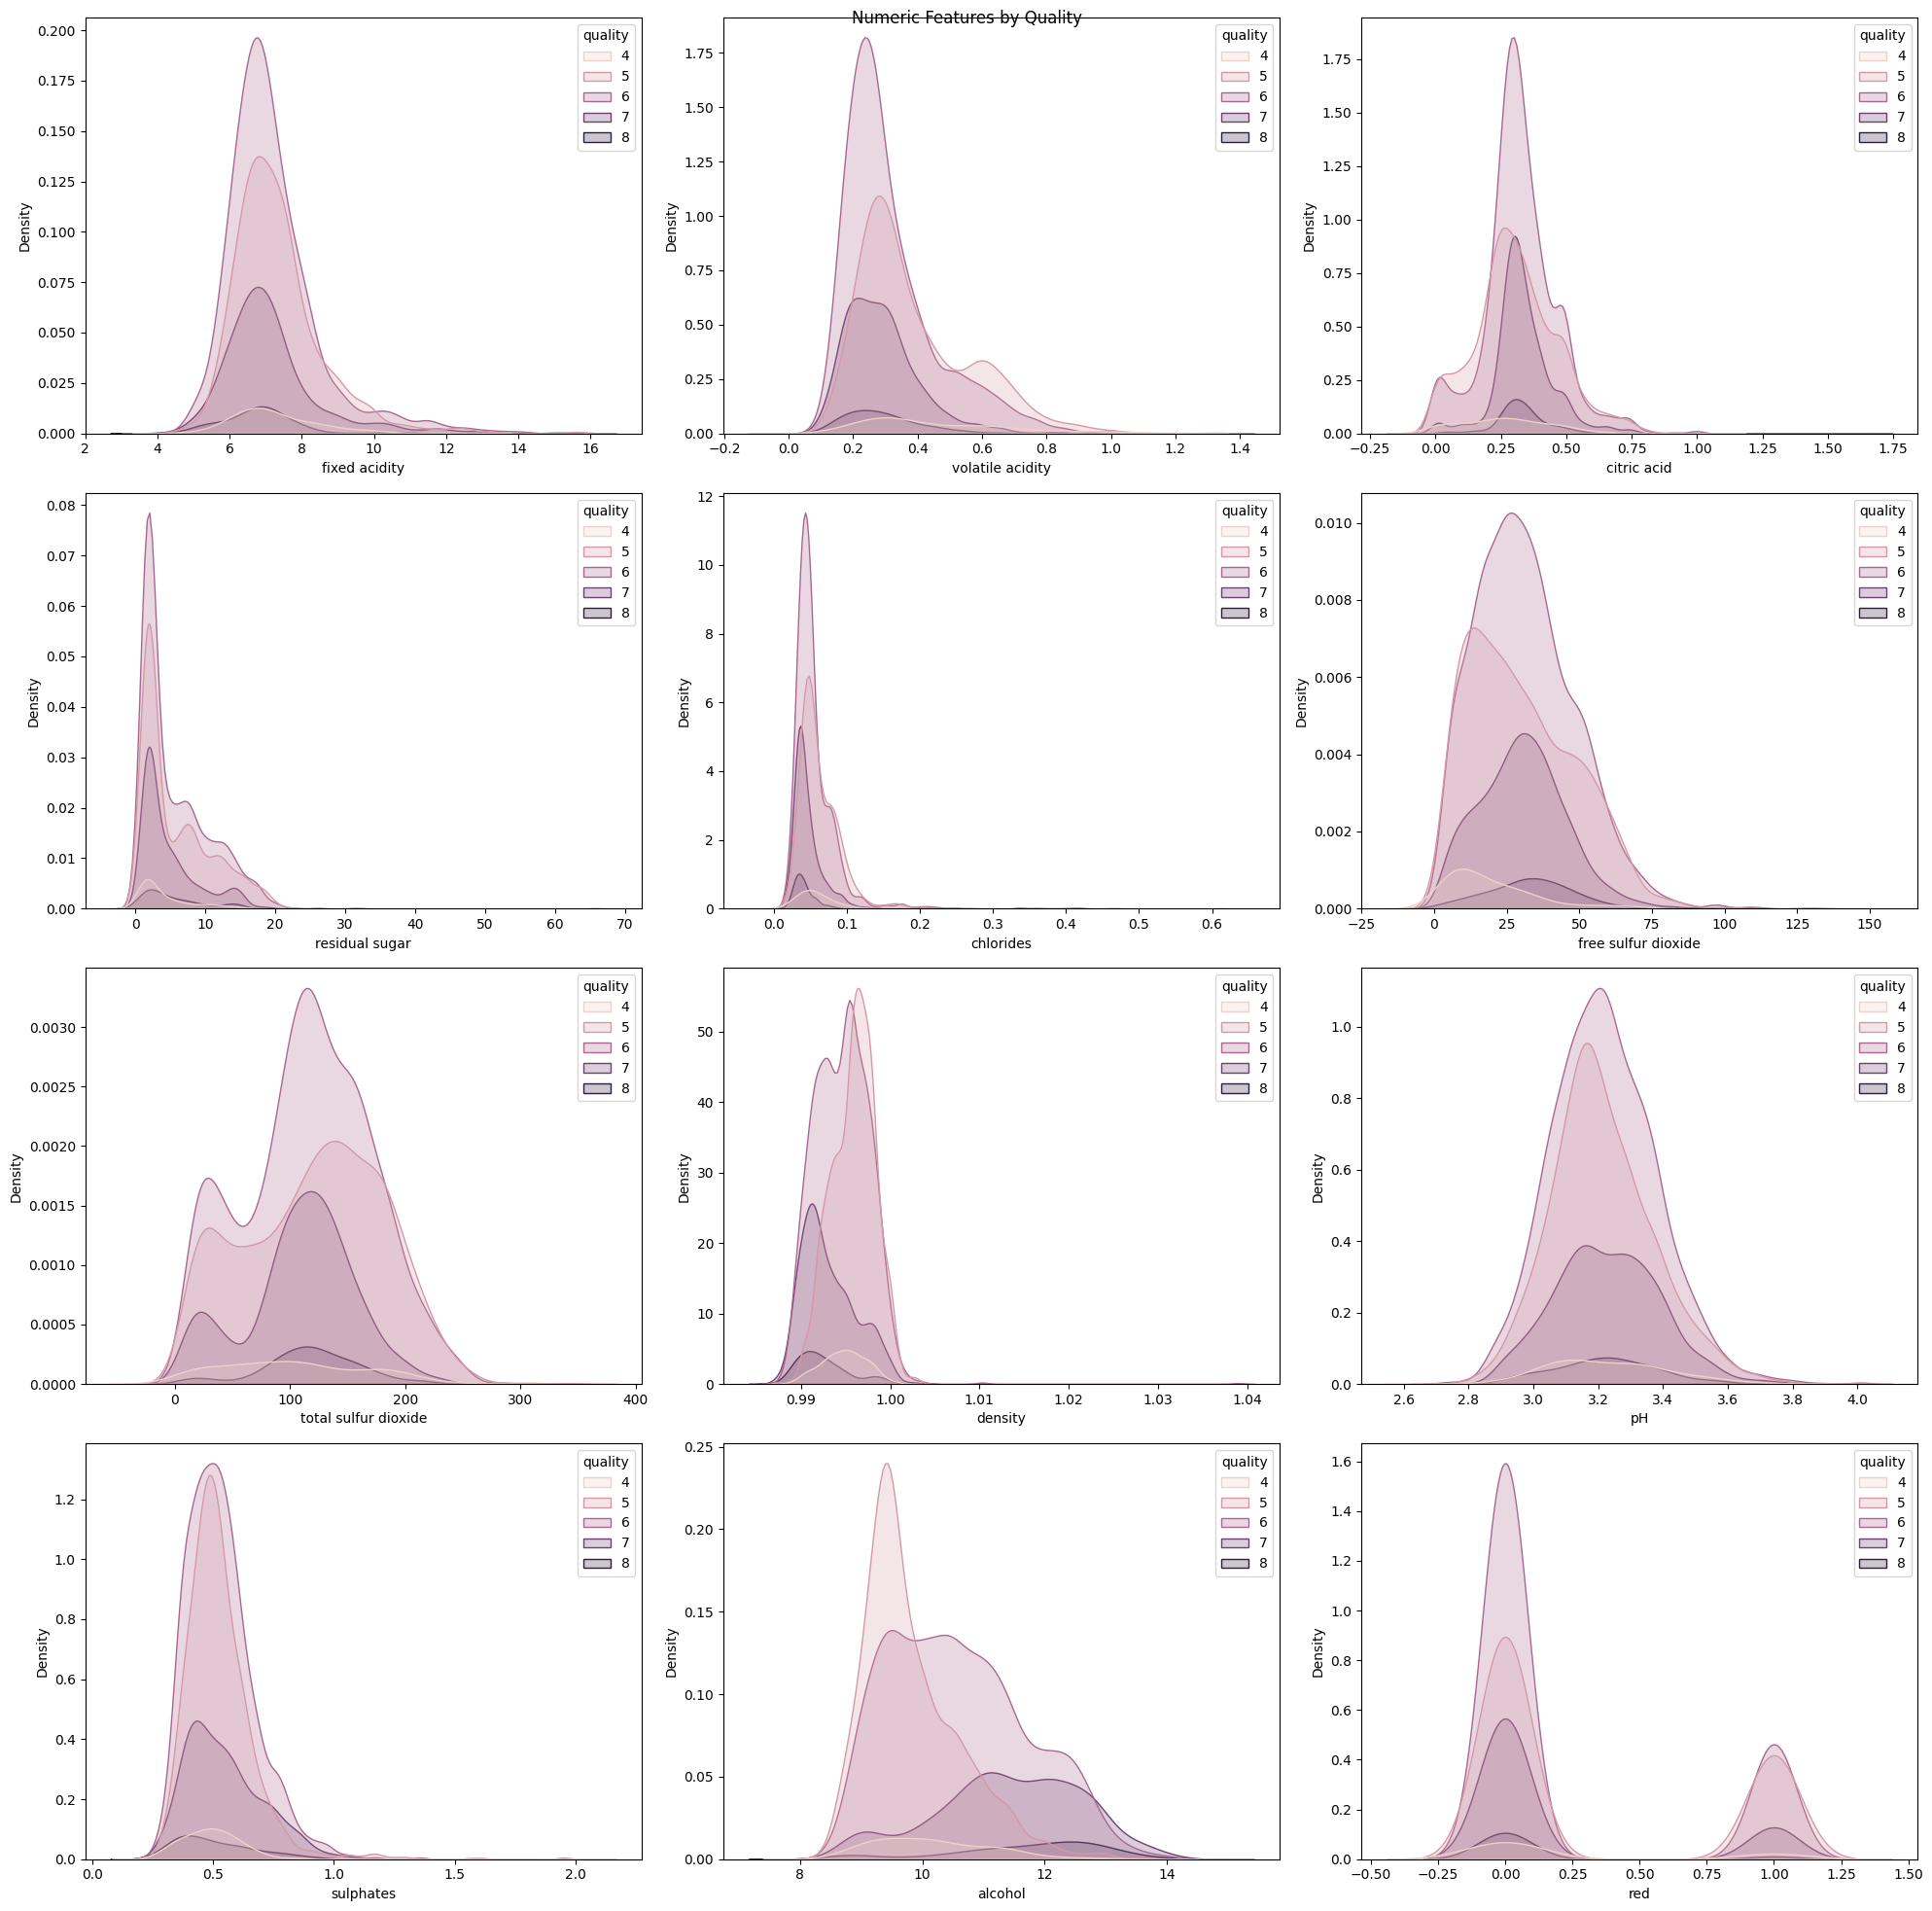

In [3]:
numeric = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'red'
]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axs = axs.ravel()
fig.suptitle('Numeric Features by Quality')
for i in range(len(numeric)):
    sns.kdeplot(data=df_wine, x=numeric[i], hue='quality', ax=axs[i], fill=True)
plt.tight_layout()
plt.show()

In [4]:
correlations = df_wine.corr()['quality'].sort_values(ascending=False)
correlations = correlations.drop('quality')
print(correlations)

alcohol                 0.451626
citric acid             0.083112
free sulfur dioxide     0.065998
sulphates               0.038415
pH                      0.022350
residual sugar         -0.038387
total sulfur dioxide   -0.041316
fixed acidity          -0.072305
red                    -0.118560
chlorides              -0.196806
volatile acidity       -0.259724
density                -0.307659
Name: quality, dtype: float64


In [5]:
correlations = correlations.apply(lambda x: abs(x)).sort_values(ascending=False)
correlations

alcohol                 0.451626
density                 0.307659
volatile acidity        0.259724
chlorides               0.196806
red                     0.118560
citric acid             0.083112
fixed acidity           0.072305
free sulfur dioxide     0.065998
total sulfur dioxide    0.041316
sulphates               0.038415
residual sugar          0.038387
pH                      0.022350
Name: quality, dtype: float64

### Perform Guassian Naive Bayes

Quality Labels: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
precision=[0.         0.53877005 0.50732357 0.47008547 0.        ]
recall=[0.         0.73406193 0.55297533 0.19503546 0.        ]
f-score=[0.         0.62143408 0.52916667 0.27568922 0.        ]
support=[ 49 549 689 282  47]
Quality Labels: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
precision=[0.         0.49246231 0.50084034 0.34666667 0.        ]
recall=[0.         0.72998138 0.40877915 0.31325301 0.        ]
f-score=[0.         0.58814704 0.45015106 0.32911392 0.        ]
support=[ 50 537 729 249  51]
Quality Labels: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
precision=[0.22222222 0.50293255 0.51285714 0.41333333 0.        ]
recall=[0.03636364 0.64962121 0.49654219 0.34572491 0.        ]
f-score=[0.0625     0.56694215 0.50456781 0.37651822 0.        ]
support=[ 55 528 723 269  41]
Quality Labels: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int6

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Text(0, 0.5, 'Average F1 Score')

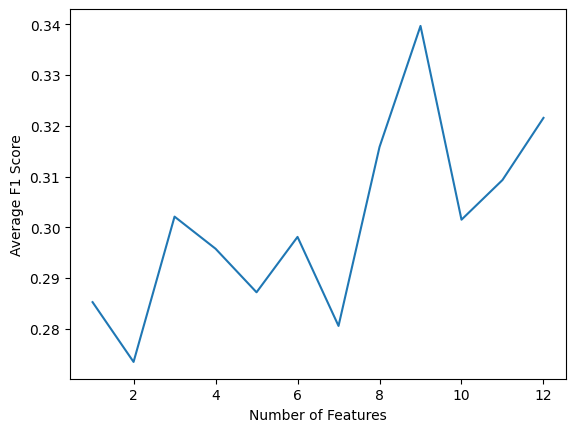

In [6]:
list_of_features = correlations.index.tolist()
fscore_by_features = []

for i in range(1, len(list_of_features) + 1):

    selected_features = list_of_features[:i]
    # Use Gaussian for datasets with quantitative variables
    clf = GaussianNB()
    X_train, X_test, y_train, y_test = train_test_split(df_wine[selected_features], df_wine['quality'], test_size=0.25)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
    print("Quality Labels: "+ str(sorted(df_wine['quality'].unique())))
    print(f'precision={p}\nrecall={r}\nf-score={f}\nsupport={s}')
    fscore_by_features.append(np.mean(f))



plt.plot(range(1, len(list_of_features) + 1), fscore_by_features)
plt.xlabel('Number of Features')
plt.ylabel('Average F1 Score')


In [17]:
selected_features = list_of_features[:10]
# Use Gaussian for datasets with quantitative variables
clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(df_wine[selected_features], df_wine['quality'], test_size=0.25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print("Quality Labels: "+ str(sorted(df_wine['quality'].unique())))
print(f'precision={p}\nrecall={r}\nf-score={f}\nsupport={s}')

Quality Labels: [np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
precision=[0.15384615 0.52754237 0.47994056 0.31466667 0.12280702]
recall=[0.09230769 0.45604396 0.46811594 0.4469697  0.1372549 ]
f-score=[0.11538462 0.4891945  0.47395451 0.36932707 0.12962963]
support=[ 65 546 690 264  51]
